In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import math
from matplotlib.mlab import PCA as mlabPCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [116]:
df=pd.read_csv('data/world-happiness-report/2016.csv')
sns.set_style("white")

In [117]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Denmark,Western Europe,1,7.526,7.460,7.592,1.44178,1.16374,0.79504,0.57941,0.44453,0.36171,2.73939
1,Switzerland,Western Europe,2,7.509,7.428,7.590,1.52733,1.14524,0.86303,0.58557,0.41203,0.28083,2.69463
2,Iceland,Western Europe,3,7.501,7.333,7.669,1.42666,1.18326,0.86733,0.56624,0.14975,0.47678,2.83137
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
4,Finland,Western Europe,5,7.413,7.351,7.475,1.40598,1.13464,0.81091,0.57104,0.41004,0.25492,2.82596


In [105]:
df2= pd.read_excel('https://query.data.world/s/2lp4szr263jl2vukusy73vszmdo6wu')

In [121]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [122]:
X=df[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)']]
y=df['Happiness Score']
X_train, X_test, y_train, y_test = train_test_split(X,y) 

In [124]:
#X_train.shape, y_train.shape
X_test.shape, y_test.shape

((40, 5), (40,))

In [125]:
lg=LinearRegression()
lg.fit(X_train,y_train)
lg.score(X_test,y_test)

0.8001900958190082

In [127]:
df['country_num']=pd.Categorical(df.Country).codes

In [130]:
df['region_num']=pd.Categorical(df.Region).codes

In [131]:
X=df[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','country_num','region_num']]
y=df['Happiness Score']
X_train, X_test, y_train, y_test = train_test_split(X,y) 

In [132]:
lg=LinearRegression()
lg.fit(X_train,y_train)
lg.score(X_test,y_test)

0.8083709501825245

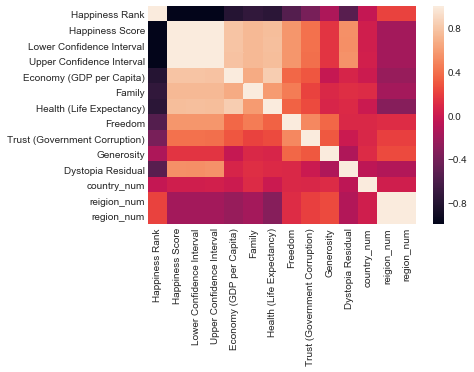

In [134]:
sns.heatmap(df.corr())

In [ ]:
df3=pd.merge(df, df2, left_on='')
    
    

In [137]:
df2.region.unique()

array(['WE/EU', 'AP', 'AME', 'MENA', 'SSA', 'ECA'], dtype=object)

In [136]:
df.Region.unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

In [140]:
df3=pd.merge(df,df2, left_on=['Country'], right_on='country')

In [142]:
df3.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Lower Confidence Interval', 'Upper Confidence Interval',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'country_num', 'reigion_num', 'region_num', 'rank',
       'country', '2016_population', 'score', 'sources', 'range_max',
       'range_min', '90_confidence_lower', '90_confidence_higher',
       '90_confidence_range', 'region', 'standard_error', 'web_code', 'oecd',
       'g20', 'brics', 'eu', 'arab_states'],
      dtype='object')

In [143]:
X=df3[['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)','country_num','region_num','2016_population','score']]
y=df3['Happiness Score']
X_train, X_test, y_train, y_test = train_test_split(X,y) 

In [144]:
lg=LinearRegression()
lg.fit(X_train,y_train)
lg.score(X_test,y_test)

0.7737258493990568

In [149]:
standardizer=StandardScaler()
X_norm=standardizer.fit_transform(X)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X,y) 

In [151]:
lg=LinearRegression()
lg.fit(X_train,y_train)
lg.score(X_test,y_test)

0.6462233907619961

In [152]:
from sklearn.ensemble import RandomForestRegressor

In [153]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_test, y_test)

0.6313112081036028

In [155]:
dict(zip(rf.feature_importances_,X_train.columns))

{0.5015845597741925: 'Economy (GDP per Capita)',
 0.10593461019101344: 'Family',
 0.10348474421700737: 'Health (Life Expectancy)',
 0.1297059696554053: 'Freedom',
 0.04792282025101574: 'Trust (Government Corruption)',
 0.0223332198459791: 'country_num',
 0.012262982598651266: 'region_num',
 0.02686825095919344: '2016_population',
 0.04990284250754184: 'score'}